<a href="https://colab.research.google.com/github/Jesus21A/FromRawDataToIntelligentPredictions/blob/main/ForecastingElectricalDemand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

API de Kaggle configurada exitosamente.
Dataset URL: https://www.kaggle.com/datasets/fedesoriano/electric-power-consumption
License(s): copyright-authors
electric-power-consumption.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  electric-power-consumption.zip
  inflating: powerconsumption.csv    

Dataset descargado y descomprimido.
Archivo 'powerconsumption.csv' cargado exitosamente.
Columnas encontradas: ['Datetime', 'Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows', 'DiffuseFlows', 'PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3']


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 144, 1)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 142, 64)        │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 71, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4544)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │         4,545 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,801 (18.75 KB)

 Trainable params: 4,801 (18.75 KB)

 Non-trainable params: 0 (0.00 B)


Entrenando el modelo con el dataset correcto. Usando 24 horas de datos (144 puntos) para predecir...
Epoch 1/20
654/654 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - loss: 0.0165 - val_loss: 6.9175e-04
Epoch 2/20
654/654 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - loss: 8.2490e-04 - val_loss: 3.7796e-04
Epoch 3/20
654/654 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 3.9501e-04 - val_loss: 2.0203e-04
Epoch 4/20
654/654 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 2.4132e-04 - val_loss: 1.8667e-04
Epoch 5/20
654/654 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 2.3507e-04 - val_loss: 2.7437e-04
Epoch 6/20
654/654 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - loss: 2.1380e-04 - val_loss: 1.4927e-04
Epoch 7/20
654/654 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 2.2439e-04 - val_loss: 1.3116e-04
Epoch 8/20
654/654 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - loss: 2.0310e-04 - val_loss: 1.3271e-04
Epoch 9/20
654/654 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 1.9244e-04 - val_loss: 1.2266e-04
Epoch 10/20
654/654 ━━━━━━━━━━━━━━━━━━━━ 8s 

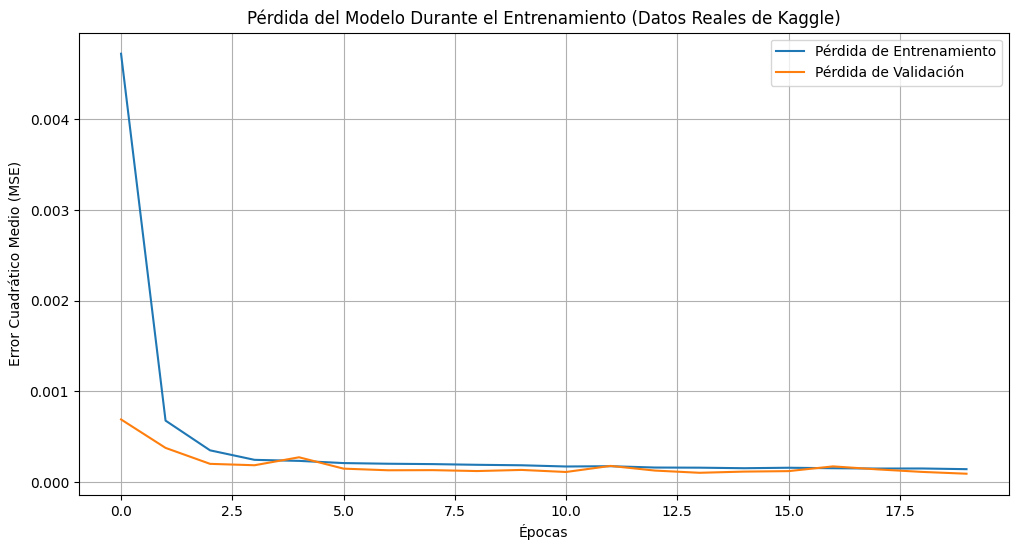

In [1]:
# ==============================================================================
# PASO 0: CONFIGURACIÓN INICIAL EN GOOGLE COLAB
# ==============================================================================
# 1. En el panel izquierdo de Google Colab, haz clic en el ícono de la carpeta.
# 2. Haz clic en el botón "Subir" (el ícono de un archivo con una flecha hacia arriba).
# 3. Selecciona y sube el archivo `kaggle.json` que descargaste desde tu cuenta de Kaggle.

# ==============================================================================
# PASO 1: INSTALAR Y CONFIGURAR LA API DE KAGGLE
# ==============================================================================
# Estas celdas ejecutan comandos en el sistema operativo de Colab, por eso usan '!'

# Instala la librería de Kaggle
!pip install -q kaggle

# Crea una carpeta oculta llamada '.kaggle' en el directorio raíz
!mkdir -p ~/.kaggle

# Mueve tu token de API a esa carpeta
!cp kaggle.json ~/.kaggle/

# Asigna los permisos correctos al archivo para que sea seguro
!chmod 600 ~/.kaggle/kaggle.json

print("API de Kaggle configurada exitosamente.")

# ==============================================================================
# PASO 2: DESCARGAR Y DESCOMPRIMIR EL DATASET CORRECTO
# ==============================================================================
# Descarga el dataset que corresponde a tu archivo 'powerconsumption.csv'
!kaggle datasets download -d fedesoriano/electric-power-consumption

# Citamos al autor
# fedesoriano. (August 2022). Electric Power Consumption.
# Retrieved [Date Retrieved] from https://www.kaggle.com/datasets/fedesoriano/electric-power-consumption.

# Descomprime el archivo .zip que se descargó
!unzip -o electric-power-consumption.zip

print("\nDataset descargado y descomprimido.")


# ==============================================================================
# PASO 3: CARGAR Y PREPARAR LOS DATOS CON PANDAS
# ==============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# El nombre del archivo que se descomprime es 'powerconsumption.csv'
csv_filename = 'powerconsumption.csv'
target_column = 'PowerConsumption_Zone1' # Columna que vamos a predecir

try:
    # Leemos el CSV, especificando que la columna 'Datetime' contiene fechas.
    df = pd.read_csv(csv_filename, parse_dates=['Datetime'])
    print(f"Archivo '{csv_filename}' cargado exitosamente.")
    print("Columnas encontradas:", df.columns.tolist())
except FileNotFoundError:
    print(f"Error: No se encontró el archivo '{csv_filename}'.")
    print("Asegúrate de que el PASO 2 se ejecutó correctamente y el archivo fue descomprimido.")
    exit()

# Ordenamos los datos por fecha
df = df.sort_values('Datetime')

# Seleccionamos la columna de consumo que nos interesa y la convertimos a un array de NumPy
datos_consumo = df[target_column].values

# Normalización de los datos
min_val = np.min(datos_consumo)
max_val = np.max(datos_consumo)
datos_consumo_normalizados = (datos_consumo - min_val) / (max_val - min_val)

# ==============================================================================
# PASO 4: CREAR VENTANAS Y DEFINIR EL MODELO (Lógica Corregida)
# ==============================================================================
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.models import Model

def crear_ventanas(datos, tamano_ventana):
    X, y = [], []
    for i in range(len(datos) - tamano_ventana):
        X.append(datos[i:i + tamano_ventana])
        y.append(datos[i + tamano_ventana])
    return np.array(X), np.array(y)

# Nota: Como los datos son cada 10 minutos, hay 6 puntos de datos por hora.
# Para usar 24 horas de historia, la ventana debe ser 6 * 24 = 144.
PUNTOS_POR_HORA = 6
HORAS_A_USAR = 24
TAMANO_VENTANA = PUNTOS_POR_HORA * HORAS_A_USAR  # 144 puntos

X, y = crear_ventanas(datos_consumo_normalizados, TAMANO_VENTANA)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Definición del Modelo CNN 1D
input_layer = Input(shape=(TAMANO_VENTANA, 1))
conv1 = Conv1D(filters=64, kernel_size=3, activation='relu')(input_layer)
pool1 = MaxPooling1D(pool_size=2)(conv1)
flat = Flatten()(pool1)
output_layer = Dense(1)(flat)

modelo = Model(inputs=input_layer, outputs=output_layer)
modelo.compile(optimizer='adam', loss='mse')
modelo.summary()

# ==============================================================================
# PASO 5: ENTRENAMIENTO Y VISUALIZACIÓN
# ==============================================================================
print(f"\nEntrenando el modelo con el dataset correcto. Usando {HORAS_A_USAR} horas de datos ({TAMANO_VENTANA} puntos) para predecir...")
historial = modelo.fit(X, y, epochs=20, batch_size=64, verbose=1, validation_split=0.2)
print("Entrenamiento finalizado.")

# Tomamos la última ventana de datos reales para hacer una predicción
ultima_ventana_norm = datos_consumo_normalizados[-TAMANO_VENTANA:].reshape((1, TAMANO_VENTANA, 1))
prediccion_norm = modelo.predict(ultima_ventana_norm)

# Des-normalizar la predicción para interpretarla
prediccion_real = (prediccion_norm * (max_val - min_val)) + min_val

print(f"\nÚltimo valor real de consumo en '{target_column}': {datos_consumo[-1]:.2f}")
print(f"Predicción para los siguientes 10 minutos: {prediccion_real[0][0]:.2f}")

# Graficar la pérdida durante el entrenamiento
plt.figure(figsize=(12, 6))
plt.plot(historial.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(historial.history['val_loss'], label='Pérdida de Validación')
plt.title('Pérdida del Modelo Durante el Entrenamiento (Datos Reales de Kaggle)')
plt.xlabel('Épocas')
plt.ylabel('Error Cuadrático Medio (MSE)')
plt.legend()
plt.grid(True)
plt.show()